### 1 of 14 · Analyzing Mobile App Data

### Learn

We've come a long way in this course, and we've learned the following:

-   The basics of programming in Python (arithmetical operations, variables, common data types, etc.)
-   List and for loops
-   Conditional statements
-   Dictionaries and frequency tables
-   Functions
-   Jupyter Notebook

We learned about each of these topics in isolation, but in this **guided project**, we'll learn to combine these skills to perform practical data analysis. Guided projects are more involved than regular lessons, so you should expect to spend more time working on them. After completing your work, you should be able to add a project like [this](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb) to your portfolio.

For this project, we'll pretend we're working as data analysts for a company that builds Android and iOS mobile apps. We make our apps available on Google Play and in the App Store.

We only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that the number of users of our apps determines our revenue for any given app — the more users who see and engage with the ads, the better. Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users.

We've designed this to be a portfolio project; you may want to share it with potential employers one day, so we'll start our work by helping readers understand what this project is about and what we're trying to achieve. You can check the solutions for this project in this [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb). The key icon at the top of our interface will also take you to the solution notebook.

### Instructions

To help readers gain context into your project, use the first Markdown cell of the notebook to do the following:

1.  Add a title.
2.  Write a short introduction where you explain (in no more than two paragraphs):
    -   What the project is about.
    -   The goal of this project.

The title and the introduction are tentative at this point, so don't spend too much time here — you can come back later to refine them.

### 2 of 14 · Opening and Exploring the Data

### Learn

In the previous step, we outlined that our aim is to help our developers understand what type of apps are likely to attract more users on Google Play and the App Store. To do this, we'll need to collect and analyze data about mobile apps available on Google Play and the App Store.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_statista.png) Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, here are two datasets that seem suitable for our goals:

-   [A dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the dataset directly from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
-   [A dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the dataset directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

We'll start by opening and exploring these two datasets. To make them easier for you to explore, we created a function named `explore_data()` that you can repeatedly use to print rows in a readable way.




In [ ]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

The `explore_data()` function does the following:

-   Takes in four parameters:
    -   `dataset`, which will be a list of lists.
    -   `start` and `end`, which will both be integers and represent the starting and the ending indices of a slice from the dataset.
    -   `rows_and_columns`, which is expected to be a Boolean and has `False` as a default argument.
-   Slices the dataset using `dataset[start:end]`.
-   Loops through the slice, and for each iteration, prints a row and adds a new line after that row using `print('\n')`.
    -   The `\n` in `print('\n')` is a special character that won't print. Instead, the `\n` character adds a new line, and we use `print('\n')` to add some blank space between rows.
-   Prints the number of rows and columns if `rows_and_columns` is `True`.
    -   `dataset` shouldn't have a header row, or the function will print the wrong number of rows (one more row compared to the actual length).

To help you better understand what `print('\n')` does, we printed three rows from the `AppleStore.csv` dataset below. In the first code cell, we don't use `print('\n')` between rows, while in the second one we do:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_newline.png)

Now let's open the two datasets and explore them.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Open the two datasets we mentioned above, and save both as lists of lists.
    
    -   The App Store dataset is in a CSV file named `AppleStore.csv`, and the Google Play dataset is in a CSV file named `googleplaystore.csv`.
    -   You can open both CSV files directly in the Jupyter Notebook interface you see on the right of the screen.
    -   If you run into an error named `UnicodeDecodeError`, add `encoding="utf8"` to the `open()` function (for instance, use `open('AppleStore.csv', encoding='utf8')`).
2.  Explore both datasets using the `explore_data()` function.
    
    -   Print the first few rows of each dataset.
    -   Find the number of rows and columns of each dataset (recall that the function assumes the argument for the `dataset` parameter doesn't have a header row).
3.  Print the column names, and try to identify the columns that could help us with our analysis. Use the documentation for the datasets if you're having trouble understanding what a column describes. Add a link to the documentation for readers if you think the column names aren't descriptive enough.

# 3 of 14 · Deleting Wrong Data

**Learn**

In the previous step, we opened the two datasets and explored the data. Before beginning our analysis, we need to make sure the data we analyze is accurate, or the results of our analysis will be wrong. This means that we need to:

Detect inaccurate data, and correct or remove it.
Detect duplicate data, and remove the duplicates.
Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:

Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
Remove apps that aren't free.
We call this process of preparing our data for analysis data cleaning. We do data cleaning before the analysis; it includes removing or correcting wrong data, removing duplicate data, and modifying the data to fit the purpose of our analysis.

It's often said that data scientists spend around 80% of their time cleaning data, and only about 20% actually analyzing (cleaned) data. In this project, we'll see that this is not far from the truth.

Let's begin by detecting and deleting wrong data. For this guided project, we'll guide you through the entire data cleaning process. In later courses, we'll learn more about data cleaning, and you'll be able to perform data cleaning without any guidance.

If you get stuck during the following exercise, you can check the solution notebook.


**Instructions**

The Google Play dataset has a dedicated discussion section, and we can see that one of the discussions describes an error for a certain row.

Read the discussion, and determine the index of the row.

Print the row at that index to check if it's incorrect. Take into account the user reporting the error might or might have not removed the header row, so the index number might vary.

If the row has an error, remove the row using the del statement. For instance, to remove the row with the index 149 from a dataset data that is stored as a list of lists, you can use the code del data[149].
Make sure you don't run the del statement more than once, otherwise you'll delete more than one row.

Read the discussion section for the App Store dataset, and see if you can find any reports of wrong data.

# 4 of 14 · Removing Duplicate Entries: Part One

**Learn**

In the previous step, we started the data cleaning process and deleted a row with incorrect data from the Google Play dataset. If you explore the Google Play data set long enough or look at the discussions section, you'll notice some apps have duplicate entries. For instance, Instagram has four entries:

In [ ]:
for app in android:
    name = app[0]
    if name == 'Instagram'
        print(app)

In total, there are 1,181 cases where an app occurs more than once:

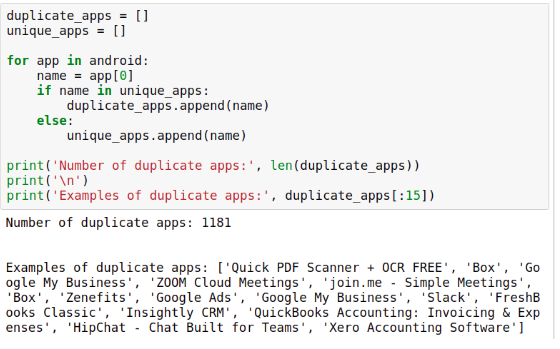

Above, we did the following:

Created two lists: one for storing the name of duplicate apps, and one for storing the name of unique apps.
Looped through the android dataset (the Google Play dataset), and for each iteration, we did the following:
We saved the app name to a variable named name.
If name was already in the unique_apps list, we appended name to the duplicate_apps list.
Else (if name wasn't already in the unique_apps list), we appended name to the unique_apps list.
(As a side note, you may notice we used the in operator above to check for membership in a list. We only learned to use in to check for membership in dictionaries, but in also works with lists):

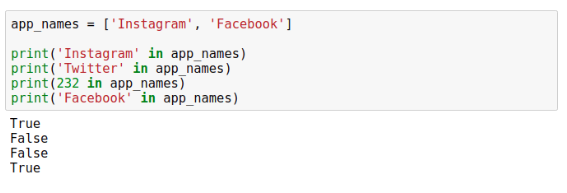

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times.

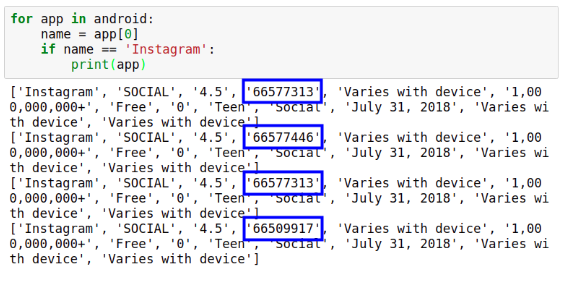

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

We'll remove the rows on the next screen. Now it's your turn to write some code to confirm the data has duplicate entries. Note that we haven't focused much on the duplicates in the App Store. If you follow along this discussion, you'll see that none of the apps have more than one entry or listing.

If you get stuck during the following exercise, you can check the solution notebook.

**Instructions**

Using a combination of narrative and code, explain to the reader that the Google Play dataset has duplicate entries. Print a few duplicate rows to confirm.

Count the number of duplicates using the technique we learned above.

Explain that you won't remove the duplicates randomly. Describe the criterion you're going to use to remove the duplicates.

We already suggested a criterion above, but you can come up with another criterion if you want. Make sure you support your criterion with at least one argument.

### 5 of 14 · Removing Duplicate Entries: Part Two

### Learn

On the previous screen, we looped through the Google Play dataset and found that there are 1,181 duplicates. After we remove the duplicates, we should be left with 9,659 rows:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_remaining.png)

To remove the duplicates, we will do the following:

-   Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
-   Use the information stored in the dictionary and create a new dataset, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

To turn the steps above into code, we'll need to use the [`not in` operator](https://docs.python.org/3/reference/expressions.html#not-in). The `not in` operator is the opposite of the `in` operator. For instance, `'z' in ['a', 'b', 'c']` returns `False` because `'z'` is not in `['a', 'b', 'c']`, but `'z' not in ['a', 'b', 'c']` returns `True` because it's true that `'z'` is _not in_ the list `['a', 'b', 'c']`.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_notin.png)

Essentially, we use both the `in` and `not in` operators to check for membership — we want to know whether a value belongs to some group of values or not. We can also use the `not in` operator to check for membership in a dictionary. As with the case of the `in` operator, the membership check is only done over the dictionary keys:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_not_in_dicts.png)

Now let's write the code to remove the duplicate entries.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Create a dictionary where each key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
    
    -   Start by creating an empty dictionary named `reviews_max`.
    -   Loop through the Google Play data set (don't include the header row). For each iteration, do the following:
        -   Assign the app name to a variable named `name`.
        -   Convert the number of reviews to `float`. Assign it to a variable named `n_reviews`.
        -   If `name` already exists as a key in the `reviews_max` dictionary **and** `reviews_max[name] < n_reviews`, update the number of reviews for that entry in the `reviews_max` dictionary.
        -   If `name` **is not in** the `reviews_max` dictionary as a key, create a new entry in the dictionary where the key is the app name, and the value is the number of reviews. Make sure you don't use an `else` clause here, or the number of reviews will be incorrectly updated whenever `reviews_max[name] < n_reviews` evaluates to `False`.
    -   Inspect the dictionary to make sure everything went as expected. Measure the length of the dictionary — remember that the expected length is 9,659 entries.
2.  Use the dictionary you created above to remove the duplicate rows:
    
    -   Start by creating two empty lists: `android_clean` (which will store our new cleaned data set) and `already_added` (which will just store app names).
    -   Loop through the Google Play dataset (don't include the header row), and for each iteration, do the following:
        -   Assign the app name to a variable named `name`.
        -   Convert the number of reviews to `float`, and assign it to a variable named `n_reviews`.
    -   If `n_reviews` is the same as the number of maximum reviews of the app `name` (the number can be found in the `reviews_max` dictionary) **and** `name` is not already in the list `already_added` (read the solution notebook to find out why we need this supplementary condition):
        -   Append the entire row to the `android_clean` list (which will eventually be a list of lists and store our cleaned dataset).
        -   Append the name of the app `name` to the `already_added` list — this helps us to keep track of apps that we already added.
3.  Explore the `android_clean` dataset to ensure everything went as expected. The dataset should have 9,659 rows. The two steps above are a bit more involved, so make sure you use Markdown to explain to the readers the steps you took.



### 6 of 14 · Removing Non-English Apps: Part One

### Learn

In the previous step, we managed to remove the duplicate app entries in the Google Play dataset. Remember we use English for the apps we develop at our company, and we'd like to analyze only the apps that are designed for an English-speaking audience. However, if we explore the data long enough, we'll find that both datasets have apps with names that suggest they are not designed for an English-speaking audience.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_non_english.png)

We're not interested in keeping these apps, so we'll remove them. One way to do this is to remove each app with a name containing a symbol that isn't commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, \*, /).

Each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character `'a'` is 97, character `'A'` is 65, and character `'爱'` is 29,233. We can get the corresponding number of each character using the [`ord()` built-in function](https://docs.python.org/3/library/functions.html#ord).

![img](https://s3.amazonaws.com/dq-content/350/py1m8_ord.png)

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

If an app name contains a character that is greater than 127, then it probably means that the app has a non-English name. Our app names, however, are stored as strings, so how could we take each individual character of a string and check its corresponding number?

In Python, strings are indexable and iterable, which means we can use indexing to select an individual character, and we can also iterate on the string using a for loop.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_str.png)

Let's first try to write the function we talked about above, and on the next screen, we'll remove the rows corresponding to the non-English apps.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Write a function that takes in a string and returns `False` if there's any character in the string that doesn't belong to the set of common English characters; otherwise, the function returns `True`.
    
    -   Inside the function, iterate over the input string. For each iteration check whether the number associated with the character is greater than 127. When a character is greater than 127, the function should immediately `return False` — the app name is probably non-English since it contains a character that doesn't belong to the set of common English characters.
    -   If the loop finishes running without the `return` statement executing, then it means no character had a corresponding number over 127 — the app name is probably English, so the functions should return `True`.
2.  Use your function to check whether these app names are detected as English or non-English:
    
    -   `'Instagram'`
    -   `'爱奇艺PPS -《欢乐颂2》电视剧热播'`
    -   `'Docs To Go™ Free Office Suite'`
    -   `'Instachat 😜'`



### 7 of 14 · Removing Non-English Apps: Part Two

### Learn

On the previous screen, we wrote a function that detects non-English app names, but we saw that the function couldn't correctly identify certain English app names like `'Docs To Go™ Free Office Suite'` and `'Instachat 😜'`. This is because emojis and characters like `™` fall outside the ASCII range and have corresponding numbers over 127.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_ord_fct.png)

If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

Let's edit the function we created on the previous screen, and then use it to filter out the non-English apps.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Change the function you created on the previous screen. If the input string has more than three characters that fall outside the ASCII range (0 - 127), then the function should return `False` (identify the string as non-English), otherwise it should return `True`.
    
2.  Use the new function to check whether these app names are detected as English or non-English:
    
    -   `'Docs To Go™ Free Office Suite'`
    -   `'Instachat 😜'`
    -   `'爱奇艺PPS -《欢乐颂2》电视剧热播'`
3.  Use the new function to filter out non-English apps from both datasets. Loop through each dataset. If an app name is identified as English, append the whole row to a separate list.
    
4.  Explore the datasets and see how many rows you have remaining for each dataset.



### 8 of 14 · Isolating the Free Apps

### Learn

So far in the data cleaning process, we've done the following:

-   Removed inaccurate data
-   Removed duplicate app entries
-   Removed non-English apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

Isolating the free apps will be our last step in the data cleaning process. On the next screen, we're going to start analyzing the data.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Loop through each dataset to isolate the free apps in separate lists. Make sure you identify the columns describing the app price correctly.
    
2.  After you isolate the free apps, check the length of each dataset to see how many apps you have remaining.



### 9 of 14 · Most Common Apps by Genre: Part One

### Learn

So far, we spent a good amount of time on cleaning data, and:

-   Removed inaccurate data
-   Removed duplicate app entries
-   Removed non-English apps
-   Isolated the free apps

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1.  Build a minimal Android version of the app, and add it to Google Play.
2.  If the app has a good response from users, we develop it further.
3.  If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our datasets.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Give readers more context into why we want to find an app profile that fits both the App Store and Google Play. Explain our validation strategy for an app idea.
    
2.  Inspect both datasets and identify the columns you could use to generate frequency tables to find out what are the most common genres in each market.



### 10 of 14 · Most Common Apps by Genre: Part Two

### Learn

On the previous screen, we looked at our validation strategy for an app idea, and then we inspected the data sets to identify the columns that might be useful for determining the most common genres in each market. Our conclusion was that we'll need to build a frequency table for the `prime_genre` column of the App Store data set, and for the `Genres` and `Category` columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

-   One function to generate frequency tables that show percentages
-   Another function we can use to display the percentages in a descending order

We already learned to generate frequency tables that show percentages, and we're going to build a function for that in the exercise below. However, dictionaries don't have order, and it will be very difficult to analyze the frequency tables. We'll need to build a second function that can help us display the entries in the frequency table in descending order.

To do that, we'll need to make use of the built-in [`sorted()` function](https://docs.python.org/3/library/functions.html#sorted). This function takes in an iterable data type (like a list, dictionary, tuple, etc.), and returns a list of the elements of that iterable sorted in ascending or descending order (the `reverse` parameter controls whether the order is ascending or descending).

![img](https://s3.amazonaws.com/dq-content/350/py1m8_sorted_0.png)

The `sorted()` function doesn't work too well with dictionaries because it only considers and returns the dictionary keys.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_sorted_1.png)

Did you notice that the results of `sorted(freq_table)` were displayed even though we did not specify the `print()` command? This is a feature of Jupyter — the output from the last command is displayed by default, without specifying `print()`.

The `sorted()` function works well if we transform the dictionary into a list of tuples, where each tuple contains a dictionary key along with its corresponding dictionary value. To ensure the sorting works right, the dictionary value comes first, and the dictionary key comes second:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_sorted_2.png)

This is a bit overcomplicated to just sort a dictionary, but there are much simpler ways to do this once we learn more advanced techniques. Using the workaround above, we wrote a helper function for you named `display_table()`, which you'll be able to combine with the function you're going to write in the next exercise. The `display_table()` function you see below does the following:

-   Takes in two parameters: `dataset` and `index`. `dataset` will be a list of lists, and `index` will be an integer
-   Generates a frequency table using the `freq_table()` function (which you're going to write as an exercise)
-   Transforms the frequency table into a list of tuples, then sorts the list in a descending order
-   Prints the entries of the frequency table in descending order


Let's now create a function for generating frequency tables and use it in combination with the `display_table()` function.

```python
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
```

### Instructions

1.  Create a function named `freq_table()` that takes in two inputs: `dataset` (which will be a list of lists) and `index` (which will be an integer).
    
    -   The function should return the frequency table (as a dictionary) for any column we want. The frequencies should also be expressed as percentages.
    -   We already learned how to build frequency tables in [the lesson on dictionaries](https://app.dataquest.io/m/314/dictionaries-and-frequency-tables/8/looping-over-dictionaries).
2.  Copy the `display_table()` function we wrote above. Use it to display the frequency table of the columns `prime_genre`, `Genres`, and `Category`. We'll analyze the resulting tables on the next screen.



### 11 of 14 · Most Common Apps by Genre: Part Three

### Learn

On the previous screen, we generated frequency tables for the columns `prime_genre`, `Genres`, and `Category`. We'll now focus on analyzing these frequency tables.

Remember our dataset only contains free English apps, so you should be careful not to extend your conclusions beyond that scope. If you find that gaming apps are the most numerous among the free English apps on Google Play, it doesn't mean we'll see the same pattern on Google Play as a whole.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Analyze the frequency table you generated for the `prime_genre` column of the App Store dataset.
    
    -   What is the most common genre? What is the next most common?
    -   What other patterns do you see?
    -   What is the general impression — are most of the apps designed for practical purposes (education, shopping, utilities, productivity, lifestyle) or more for entertainment (games, photo and video, social networking, sports, music)?
    -   Can you recommend an app profile for the App Store market based on this frequency table alone? If there's a large number of apps for a particular genre, does that also imply that apps of that genre generally have a large number of users?
2.  Analyze the frequency table you generated for the `Category` and `Genres` column of the Google Play dataset.
    
    -   What are the most common genres?
    -   What other patterns do you see?
    -   Compare the patterns you see for the Google Play market with those you saw for the App Store market.
    -   Can you recommend an app profile based on what you found so far? Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?



### 12 of 14 · Most Popular Apps by Genre on the App Store

### Learn

The frequency tables we analyzed on the previous screen showed us that apps designed for fun dominate the App Store, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to determine the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play dataset, we can find this information in the `Installs` column, but this information is missing for the App Store dataset. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to do the following:

-   Isolate the apps of each genre
-   Add up the user ratings for the apps of that genre
-   Divide the sum by the number of apps belonging to that genre (not by the total number of apps)

To calculate the average number of user ratings for each genre, we'll use a for loop inside of another for loop. This is an example of a for loop used inside another for loop:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_nested_loop.png)

Above, we can see the following:

-   We first iterate over the `some_strings` list, and for each iteration, we do the following:
    -   We print `string` (iteration variable)
    -   We start another iteration over the list `some_integers`
        -   For each iteration over this list, we print `integer` (iteration variable)

We can see that for each of the two iterations over the list `some_strings` (there are two iterations because `some_strings` only has two list elements), there's another inner iteration happening over the list `some_integers`.

The second iteration over `some_strings` begins only when the iteration over `some_integers` is finished. Notice that all the elements of the list `some_integers` are printed for each of the two iterations over the list `some_strings`.

We call a loop inside another loop a **nested loop**. We'll use a nested loop to compute the averages we mentioned above.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Start by generating a frequency table for the `prime_genre` column to get the unique app genres (below, we'll need to loop over the unique genres). You can use the `freq_table()` function you wrote on a previous screen.
    
2.  Loop over the unique genres of the App Store dataset. For each iteration (below, we'll assume that the iteration variable is named `genre`):
    
    -   Initiate a variable named `total` with a value of `0`. This variable will store the sum of user ratings (the number of ratings, not the actual ratings) specific to each genre.
    -   Initiate a variable named `len_genre` with a value of `0`. This variable will store the number of apps specific to each genre.
    -   Loop over the App Store dataset, and for each iteration, do the following:
        -   Save the app genre to a variable named `genre_app`.
        -   If `genre_app` is the same as `genre` (the iteration variable of the main loop), then do the following:
            -   Save the number of user ratings of the app as a float.
            -   Add up the number of user ratings to the `total` variable.
            -   Increment the `len_genre` variable by `1`.
    -   Compute the average number of user ratings by dividing `total` by `len_genre`. You should do this outside the nested loop.
    -   Print the app genre and the average number of user ratings. You should also do this outside the nested loop.
3.  Analyze the results and try to come up with at least one app profile recommendation for the App Store. Note that there's no fixed answer here, and it's perfectly fine if the app profile you recommend is different than the one recommended in the solution notebook.



### 13 of 14 · Most Popular Apps by Genre on Google Play

### Learn

On the previous screen, we came up with an app profile recommendation for the App Store based on the number of user ratings. We have data about the number of installs for the Google Play market, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

![img](https://s3.amazonaws.com/dq-content/350/py1m8_open_ended.png)

For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. To perform computations, however, we'll need to convert each install number from a string to a float. This means we need to remove the commas and the plus characters, or the conversion will fail and cause an error.

To remove characters from strings, we can use the [`str.replace(old, new)` method](https://docs.python.org/3/library/stdtypes.html?#str.replace) (just like `list.append()` or `list.copy()`, `str.replace()` is a special kind of function called method — we'll learn more about this early in the next course). `str.replace()` takes in two parameters, `old` and `new`, and replaces all occurrences of `old` within a string with `new`:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_replace_0.png)

To remove certain characters, we can replace them with the empty string `''`:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_replace_1.png)

Note that we'll need to reassign to `n_installs` if we want our changes saved:

![img](https://s3.amazonaws.com/dq-content/350/py1m8_replace_2.png)

Now let's calculate the average number of installs per app genre for the Google Play dataset. We'll need to use a nested loop, just like in the previous screen.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

### Instructions

1.  Start by generating a frequency table for the `Category` column of the Google Play dataset to get the unique app genres (below, we'll need to loop over the unique genres). You can use the `freq_table()` function you wrote in a previous screen.
    
2.  Loop over the unique genres of the Google Play dataset. For each iteration (below, we'll assume that the iteration variable is named `category`), do the following:
    
    -   Initiate a variable named `total` with a value of `0`. This variable will store the sum of installs specific to each genre.
    -   Initiate a variable named `len_category` with a value of `0`. This variable will store the number of apps specific to each genre.
    -   Loop over the Google Play dataset, and for each iteration, do the following:
        -   Save the app genre to a variable named `category_app`.
        -   If `category_app` is the same as `category` (the iteration variable of the main loop), then do the following:
            -   Save the number of installs.
            -   Remove any `+` or `,` character, and then convert the string to a float.
            -   Add up the number of installs to the `total` variable.
            -   Increment the `len_category` variable by `1`.
    -   Compute the average number of installs by dividing `total` by `len_category`. You should do this outside the nested loop.
    -   Print the app genre and the average number of installs. This should also do this outside the nested loop.
3.  Analyze the results, and try to come up with at least one app profile recommendation for Google Play. Remember, our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play. Note that there's no fixed answer here, and it's perfectly fine if the app profile you recommend is different than the one recommended in the solution notebook.



### 14 of 14 · Next Steps

### Learn

In this project, we went through a complete data science workflow:

-   We started by clarifying the goal of our project.
-   We collected relevant data.
-   We cleaned the data to prepare it for analysis.
-   We analyzed the cleaned data.

In the solution notebook, we concluded that taking a very popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store market. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc. You might have reached a different conclusion, which is perfectly fine as long as you managed to build a data-driven argumentation for your recommendation.

Here are a few next steps you could take:

-   Analyze the frequency table for the `Genre` column of the Google Play dataset, and see if you can find useful patterns.
-   Assume we could also make revenue via in-app purchases and subscriptions, and try to determine which genres seem to be liked the most by users — you could examine app ratings here.
-   Refine your project using our data science project [style guide](https://www.dataquest.io/blog/data-science-project-style-guide/).

If you're going to work on the next steps above independently, you'll almost inevitably face some problems like not knowing how to fix an error, or not knowing what code to write to perform a certain task. In situations like these, the best thing to do is to start with a Google search (or any other search engine). In most situations, there will always be people who already ran into the same kind of problem, and you'll be able to use the solution they came up with.

As you search for solutions to your problems, you'll notice that one particular site will constantly show up in the first few results of your query — [Stack Overflow](https://stackoverflow.com/). The community on Stack Overflow is very active, and the answers you'll find there are almost always accurate and up-to-date. One important tip when you're searching on Google is to start with the word "python". For instance, if you want to find out how to remove the characters from a string, search for "**python** how to remove a character from a string" (not just "how to remove a character from a string") — otherwise you'll most likely get results for other programming languages.

Congratulations! This is the end of the course! We'll continue our data science journey in the next course, where we'll keep focusing on Python and learn about object-oriented programming, dates and times, and many other concepts that are essential for a data scientist.